In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Reading the test and train CSV

In [11]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")


In [12]:
df_train = df_train.drop(['Cabin','Ticket'],axis=1)
df_test = df_test.drop(['Cabin','Ticket'],axis=1)
df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


## See the correlation with target

In [13]:
corr = df_train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

## See the correlation with among features

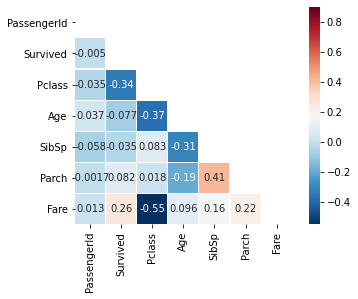

In [14]:
#Creates a mask for the upper triangle
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)

## Visualizing Pclass with Survived

In [15]:
df_train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

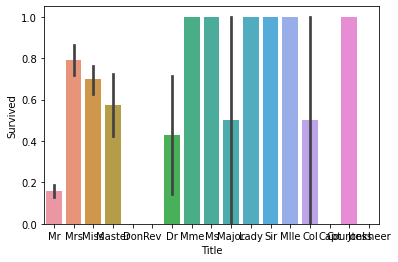

In [23]:
sns.barplot("Title","Survived",data=df_train)

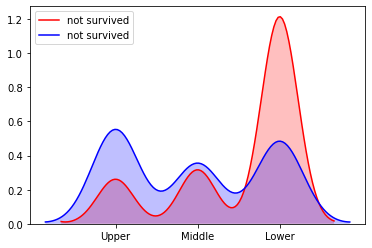

In [17]:
ax=sns.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='red',
               shade=True,
               label='not survived')
ax=sns.kdeplot(df_train.Pclass[df_train.Survived == 1] , 
               color='blue',
               shade=True,
               label='not survived')
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train.Pclass.unique()), labels);

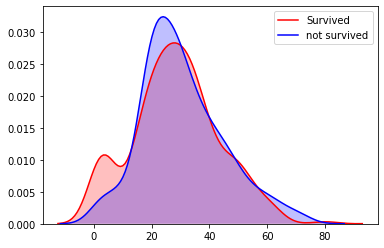

In [18]:
ax=sns.kdeplot(df_train.Age[df_train.Survived == 1] , 
               color='red',
               shade=True,
               label='Survived')

ax=sns.kdeplot(df_train.Age[df_train.Survived == 0] , 
               color='Blue',
               shade=True,
               label='not survived')


## Creating new family member

In [19]:
df_train['Family_members'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_members'] = df_test['SibSp'] + df_test['Parch']

In [20]:
df_train["Family_members"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

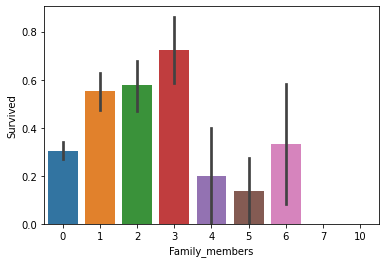

In [21]:
sns.barplot("Family_members","Survived",data=df_train)

## Playing with the title column

In [42]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].dropna().mean()) 

In [43]:
combined=pd.concat([df_train,df_test])

In [44]:
combined["Title"]=combined["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
combined["Title"]=combined["Title"].replace(['Mlle','Ms'],'Miss')
combined["Title"]=combined["Title"].replace(['Mme'],'Mrs')


In [45]:
combined['Age'] = combined['Age'].fillna(combined.groupby(["Title"])['Age'].transform('mean'))

## Binning Age columns

In [46]:
combined.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title', 'Family_members'],
      dtype='object')

In [47]:
combined.loc[ combined['Age'] <= 11, 'Age'] = 0
combined.loc[(combined['Age'] > 11) & (combined['Age'] <= 18), 'Age'] = 1
combined.loc[(combined['Age'] > 18) & (combined['Age'] <= 22), 'Age'] = 2
combined.loc[(combined['Age'] > 22) & (combined['Age'] <= 27), 'Age'] = 3
combined.loc[(combined['Age'] > 27) & (combined['Age'] <= 33), 'Age'] = 4
combined.loc[(combined['Age'] > 33) & (combined['Age'] <= 40), 'Age'] = 5
combined.loc[(combined['Age'] > 40) & (combined['Age'] <= 66), 'Age'] = 6
combined.loc[ combined['Age'] > 66, 'Age'] = 7


## Binning Family column

In [48]:
combined["Family"]=combined["Parch"]+combined["SibSp"]

In [49]:
combined.loc[ combined['Family_members'] == 0, 'Family_members_Band'] = 0
combined.loc[(combined['Family_members'] == 1)|(combined['Family_members'] == 2),'Family_members_Band'] = 1
combined.loc[ combined['Family_members'] == 3, 'Family_members_Band'] = 2
combined.loc[(combined['Family_members'] == 4)|(combined['Family_members'] == 5),'Family_members_Band'] = 3
combined.loc[ combined['Family_members'] == 6, 'Family_members_Band'] = 4
combined.loc[(combined['Family_members'] == 7)|(combined['Family_members'] == 10),'Family_members_Band'] = 5
combined['Family_members_Band'] = combined['Family_members_Band'].astype(int)

## Binning Fare column

In [50]:
combined['FareBand'] = pd.qcut(combined['Fare'], 4)

In [51]:
combined["Embarked"]=combined["Embarked"].fillna('mode')

In [52]:
combined.loc[ combined['Fare'] <= 7.91, 'Fare_Band'] = 0
combined.loc[(combined['Fare'] > 7.91) & (combined['Fare'] <= 14.454), 'Fare_Band'] = 1
combined.loc[(combined['Fare'] > 14.454) & (combined['Fare'] <= 31), 'Fare_Band'] = 2
combined.loc[ combined['Fare'] > 31, 'Fare_Band'] = 3
combined['Fare_Band'] = combined['Fare_Band'].astype(int)


## Dropping unnecssary

In [54]:
combined = combined.drop(['SibSp','Parch','Fare','Family_members','FareBand','Family','Name'],axis = 1)

KeyError: "['SibSp' 'Parch' 'Fare' 'Family_members' 'FareBand' 'Family' 'Name'] not found in axis"

In [55]:


combined = pd.get_dummies(combined, columns=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'], prefix=['Pclass','Sex'
                                                                ,'Age','Embarked','Title','Family_members_Band','Fare_Band'])



In [56]:
combined.shape

(1309, 34)

In [57]:
df_train=combined.iloc[:891,]
df_test=combined.iloc[891:,]

In [ ]:
df

In [58]:
df_train.drop(["PassengerId"],axis=1,inplace=True)

In [64]:
Y_train = df_train['Survived']
X_train = df_train.drop('Survived', axis=1)

In [65]:
Y_test = df_test['Survived']
X_test = df_test.drop('Survived', axis=1)

## Modelling 

In [74]:
X_train.shape

(891, 32)

In [73]:
X_test.shape

(418, 33)

In [96]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

## Loop over different classifiers

In [97]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [106]:


logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 3)
xgb=XGBClassifier()
#logreg_cv = LogisticRegressionCV()
gaussian = GaussianNB()
linear_svc = LinearSVC()
decision_tree = DecisionTreeClassifier()
perceptron = Perceptron(max_iter=5)
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()


models = [logreg,knn,gaussian,perceptron, linear_svc,rf, gboost,xgb,decision_tree ]
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    #score = compute_score(clf=model, X=X_train, y=Y_train, scoring='accuracy')
    model.fit(X_train,Y_train)
    score=round(model.score(X_train, Y_train) * 100, 2)
    print ('CV score = {0}'.format(score))
    print ('****')



Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 83.61
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV score = 85.86
****
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV score = 81.59
****
Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
CV score = 79.69
****
Cross-validation of : <class 'sklearn.svm._classes.LinearSVC'>
CV score = 82.83
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 90.01
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 87.21
****
Cross-validation of : <class 'xgboost.sklearn.XGBClassifier'>
CV score = 89.79
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV score = 90.01
****


In [112]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.87640449 0.71910112 0.86516854 0.86516854 0.83146067
 0.84269663 0.82022472 0.80898876 0.83146067]
Mean: 0.8271785268414483
Standard Deviation: 0.042314622653703254


## Feature Importance

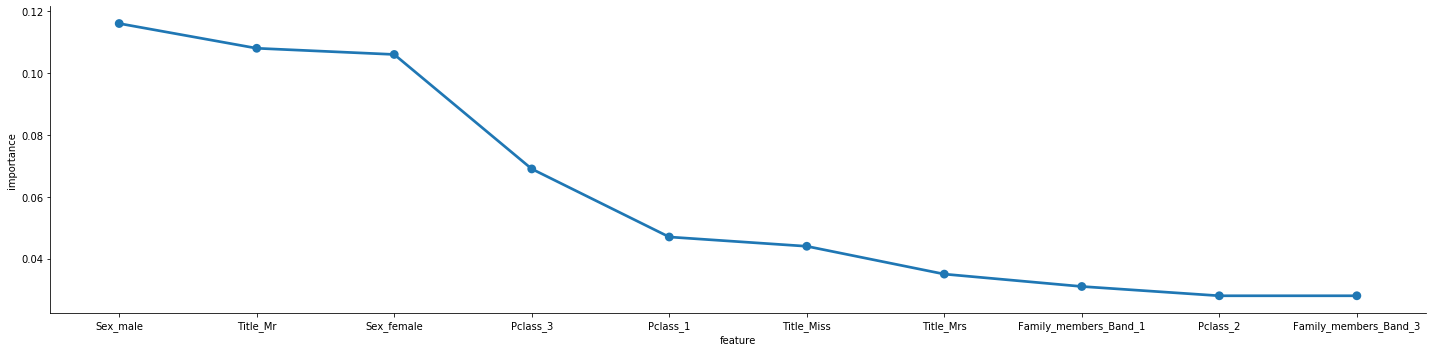

In [117]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

importances_most = importances.head(10) # 10 most important features # here we can change the quanti
axes = sns.factorplot('feature','importance', 
                      data=importances_most, aspect = 4, )



## Testing with OOB Score = True
<b> Out of bag score is diffiferent from Validation score

In [122]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test.drop(["PassengerId"],axis=1))

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.01 %


In [123]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.58999999999999 %


## Hyperparameter tuning

In [ ]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

# from sklearn.model_selection import GridSearchCV, cross_val_score

# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

# clf.fit(X_train, Y_train)

# clf.bestparams

In [134]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=180, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test.drop(["PassengerId"],axis=1))

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.27 %


## Drawing a confusion matrix

In [135]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[495,  54],
       [100, 242]])

## Submitting the solution

In [145]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": xgb.predict(X_test.drop(["PassengerId"],axis=1))
    })


In [146]:
submission["Survived"]=submission["Survived"].astype(int)


In [147]:
submission.to_csv('randomforestsubmission.csv', index=False)

In [143]:
submission.shape

(418, 2)

In [144]:
df_test.shape

(418, 34)